In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
files = [os.path.join("bf_te",x) for x in os.listdir("bf_te") if x.endswith(".npy")]


----------------------------------------------------------------------
TLG_result.npy
----------------------------------------------------------------------


/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_38050/3022731642.py:9: RuntimeWarning: All-NaN slice encountered
  nanmask = np.isnan(np.nanmedian(arr, axis =2))
/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_38050/3022731642.py:14: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmedian(arr, axis =2)); plt.colorbar(); plt.title("mean TE"); plt.tight_layout()
/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_38050/3022731642.py:17: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(arr, axis =2)); plt.colorbar(); plt.tight_layout();  plt.title("Max TE");
/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_38050/3022731642.py:29: RuntimeWarning: All-NaN slice encountered
  y = np.nanmax(arr,axis=2).flatten()


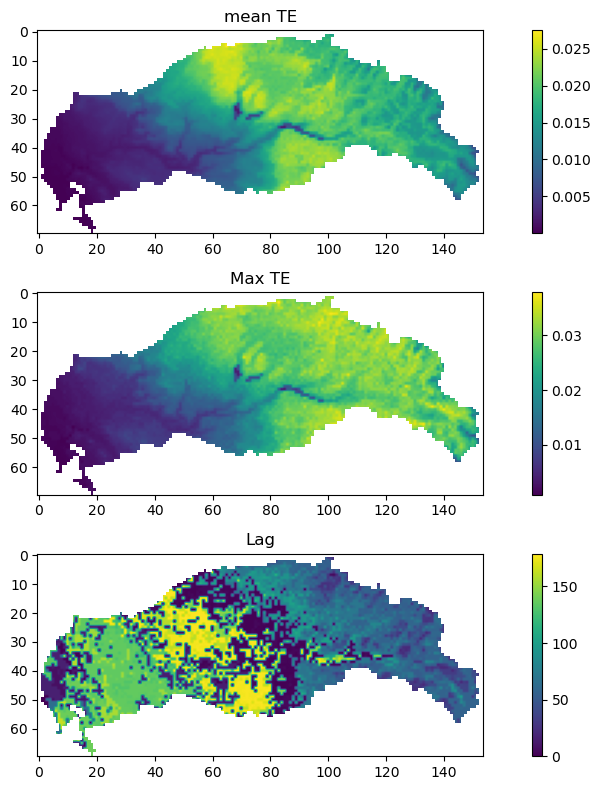

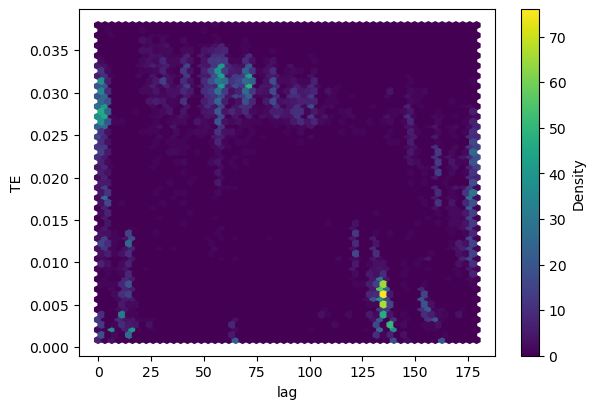

----------------------------------------------------------------------
ORO_result.npy
----------------------------------------------------------------------


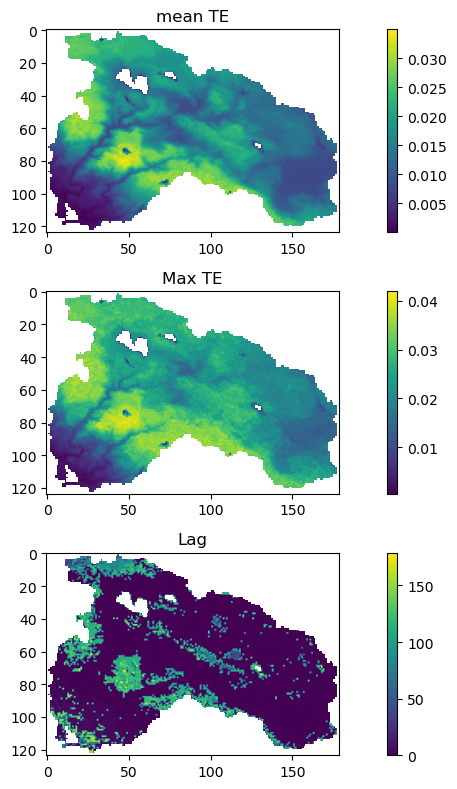

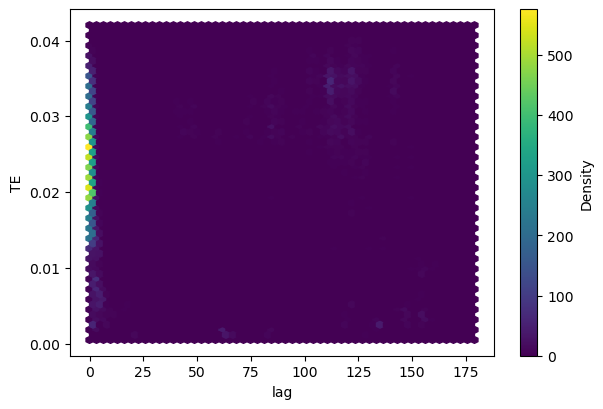

----------------------------------------------------------------------
SHA_result.npy
----------------------------------------------------------------------


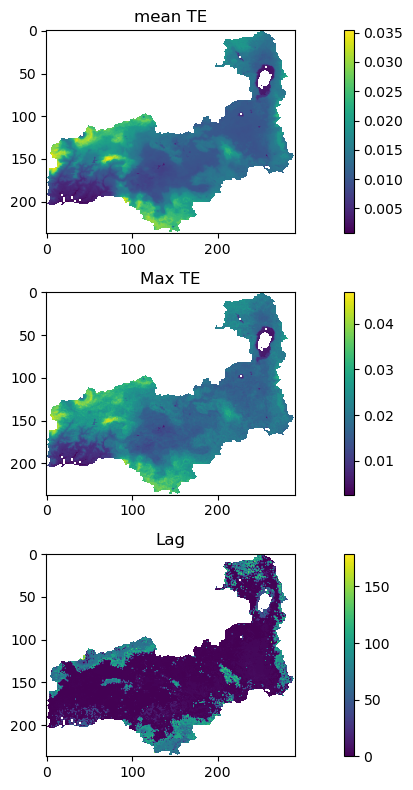

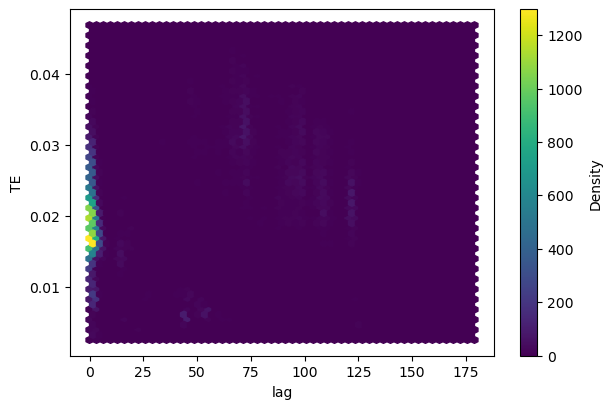

----------------------------------------------------------------------
NAT_result.npy
----------------------------------------------------------------------


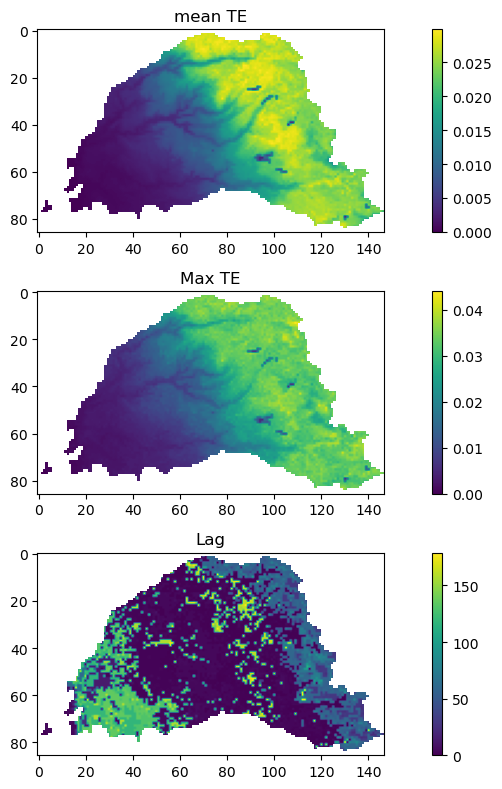

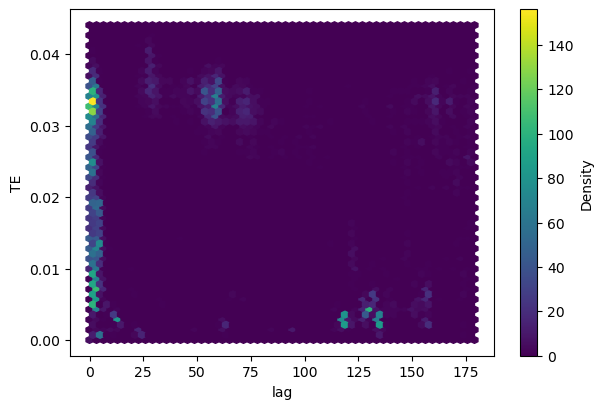

----------------------------------------------------------------------
NHG_result.npy
----------------------------------------------------------------------


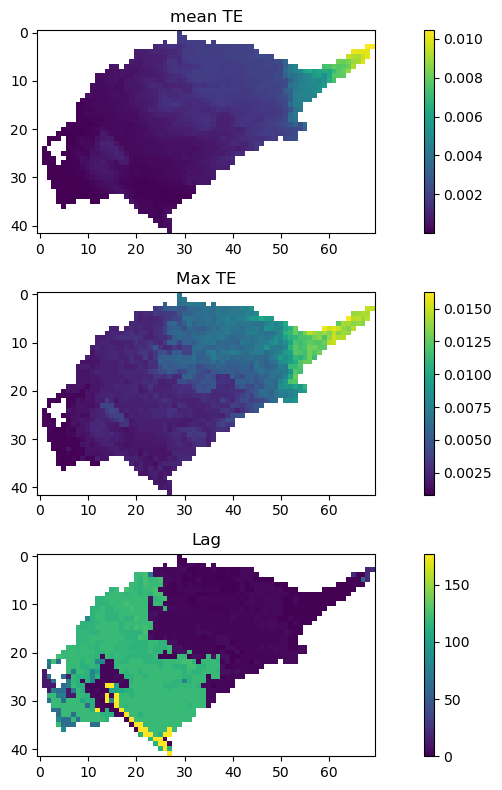

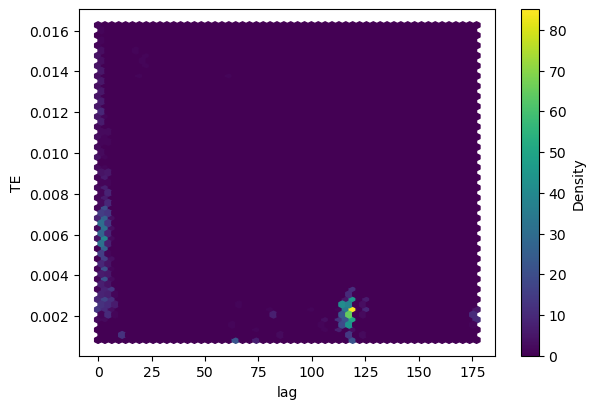

----------------------------------------------------------------------
MHB_result.npy
----------------------------------------------------------------------


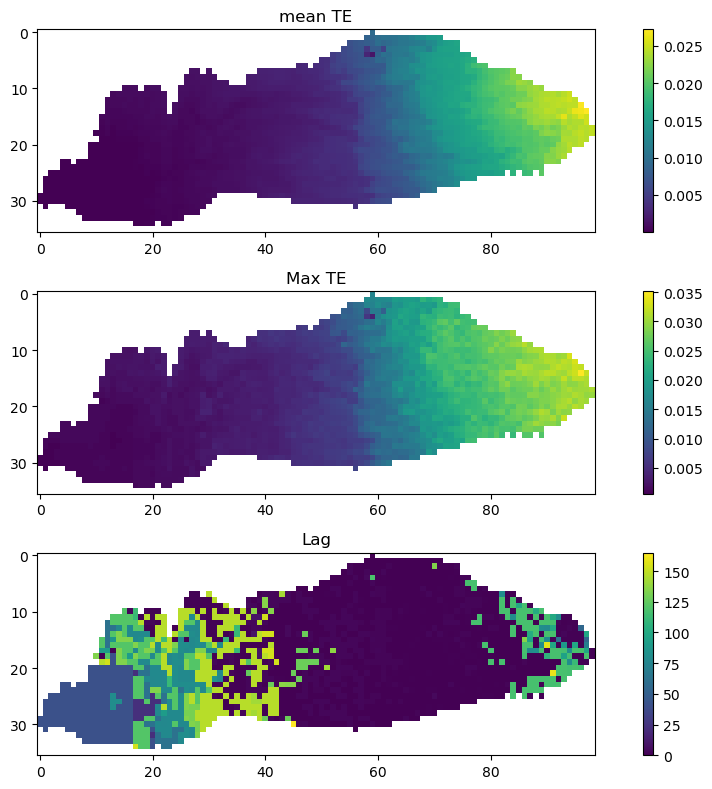

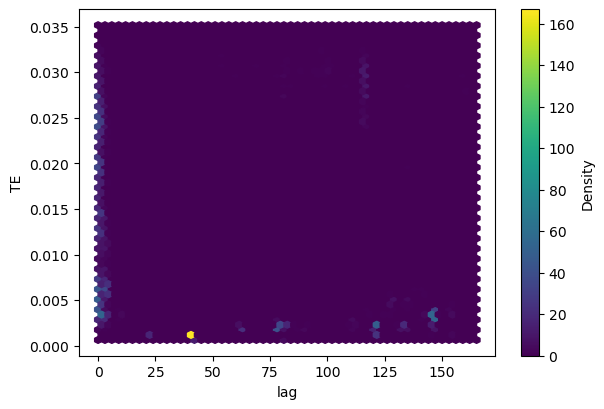

----------------------------------------------------------------------
NML_result.npy
----------------------------------------------------------------------


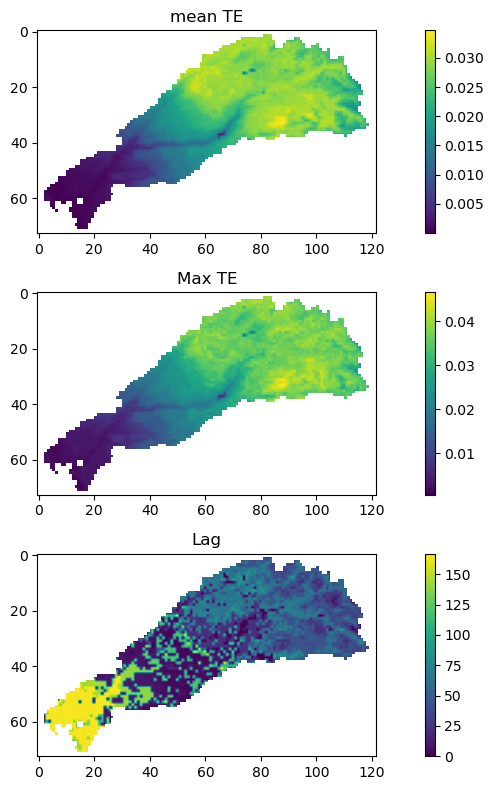

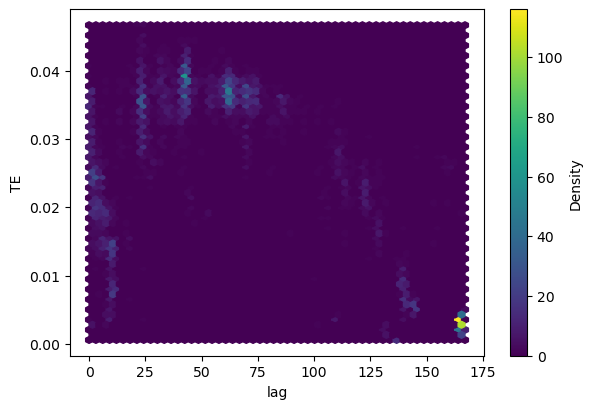

----------------------------------------------------------------------
MKM_result.npy
----------------------------------------------------------------------


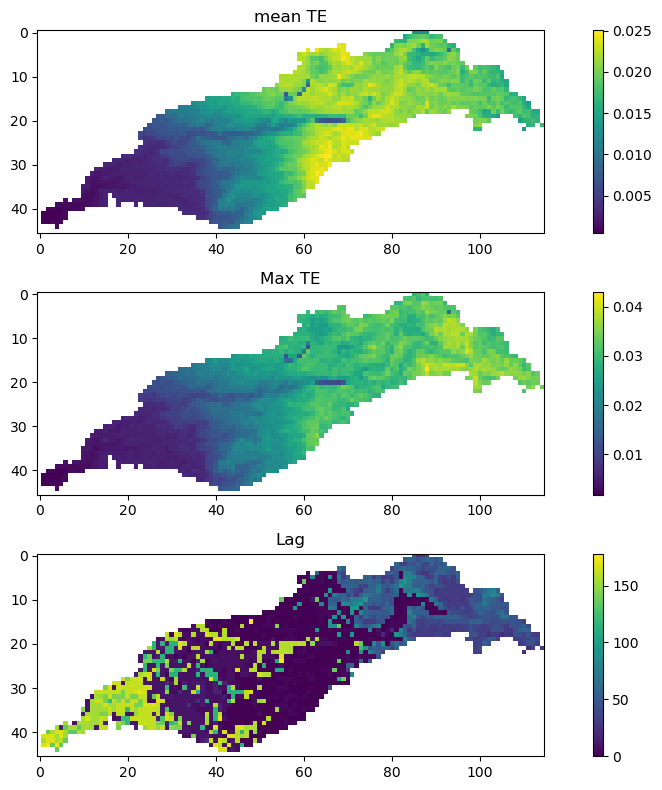

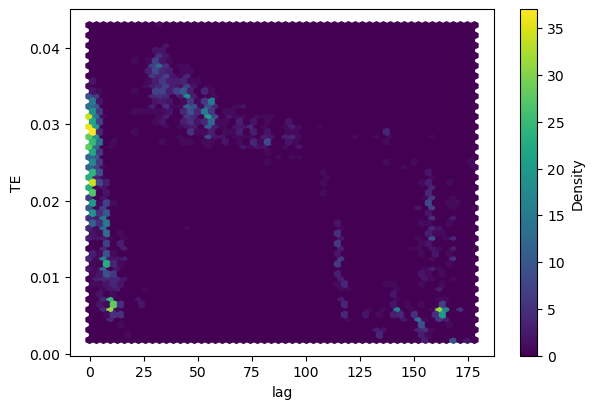

----------------------------------------------------------------------
EXC_result_rain.npy
----------------------------------------------------------------------


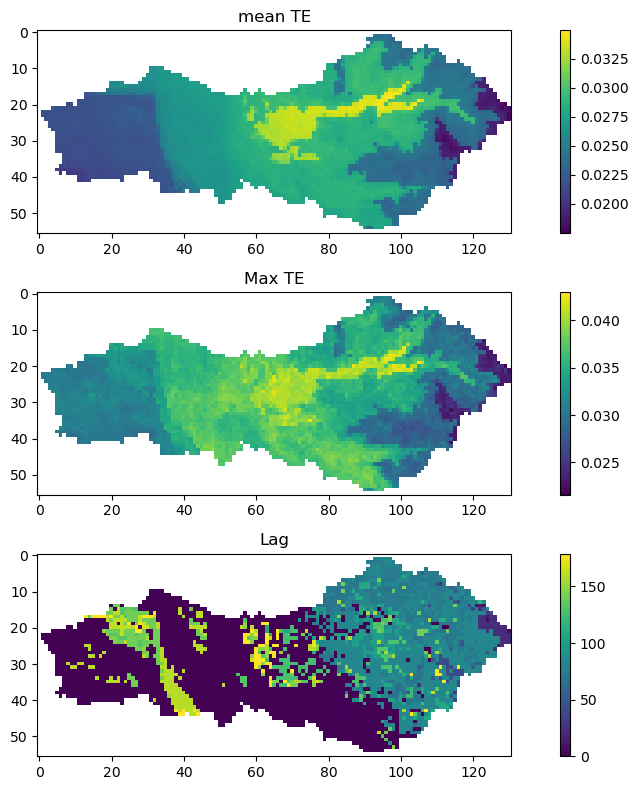

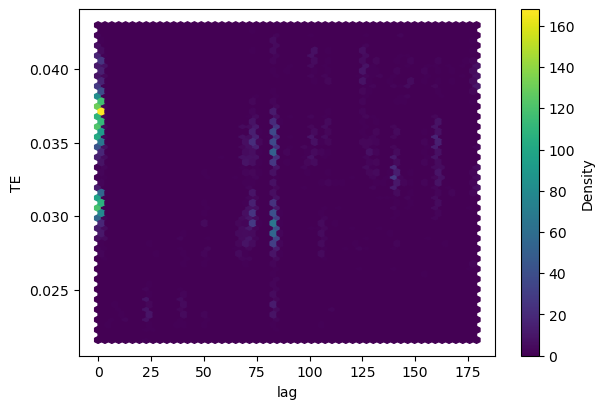

----------------------------------------------------------------------
YRS_result.npy
----------------------------------------------------------------------


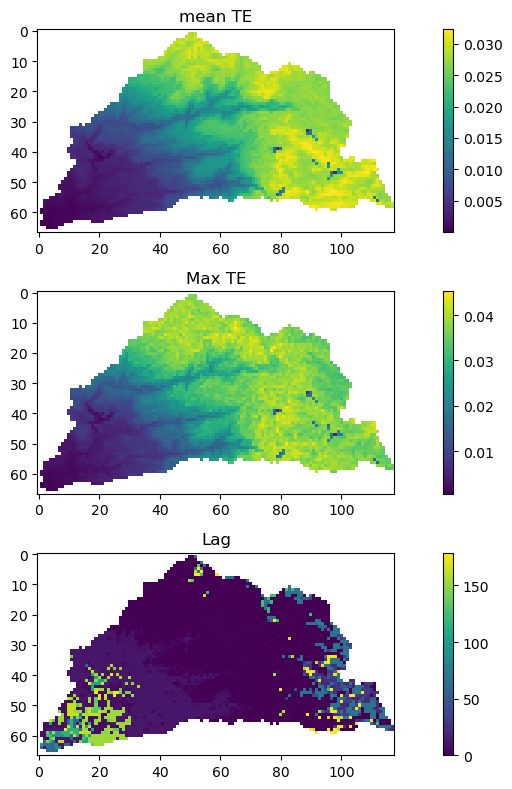

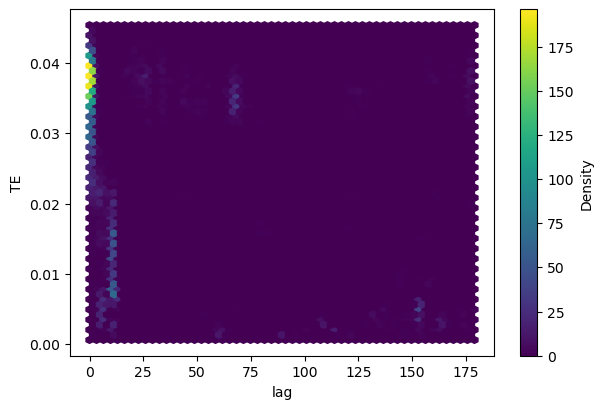

----------------------------------------------------------------------
SCC_result.npy
----------------------------------------------------------------------


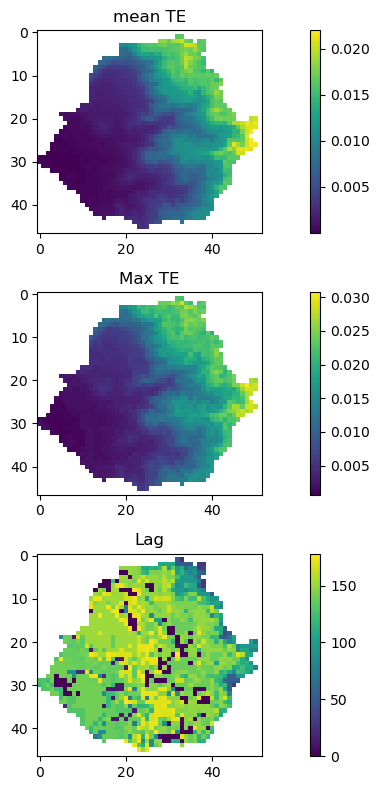

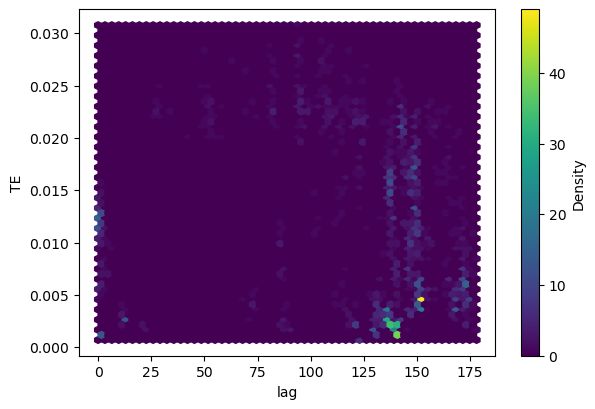

----------------------------------------------------------------------
ISB_result.npy
----------------------------------------------------------------------


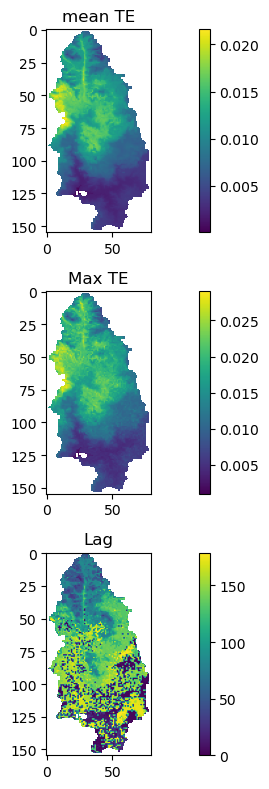

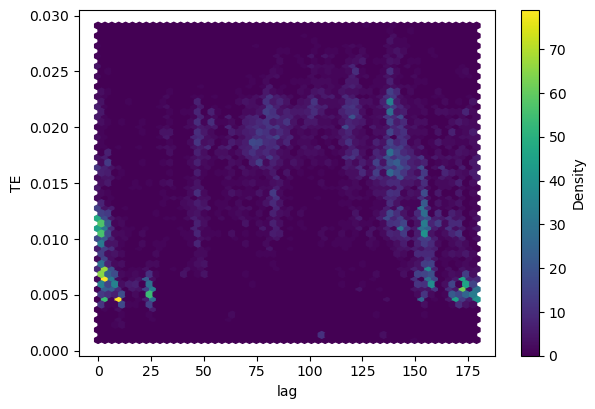

----------------------------------------------------------------------
TRM_result.npy
----------------------------------------------------------------------


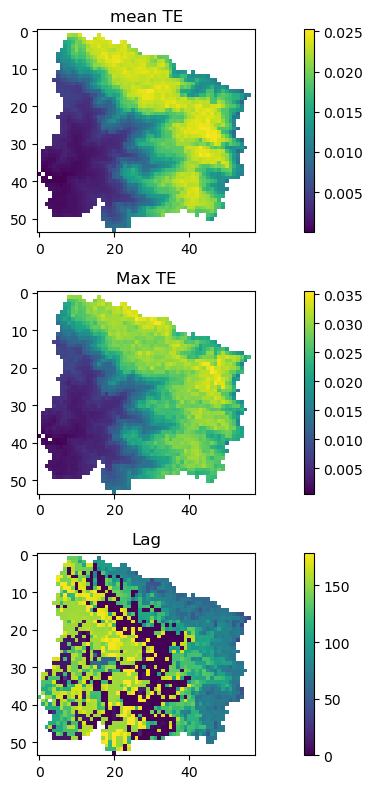

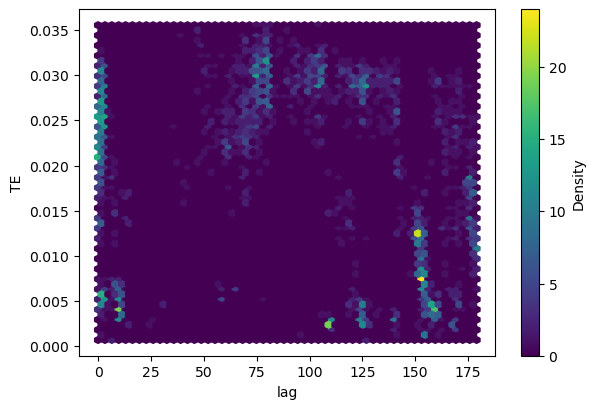

----------------------------------------------------------------------
EXC_result.npy
----------------------------------------------------------------------


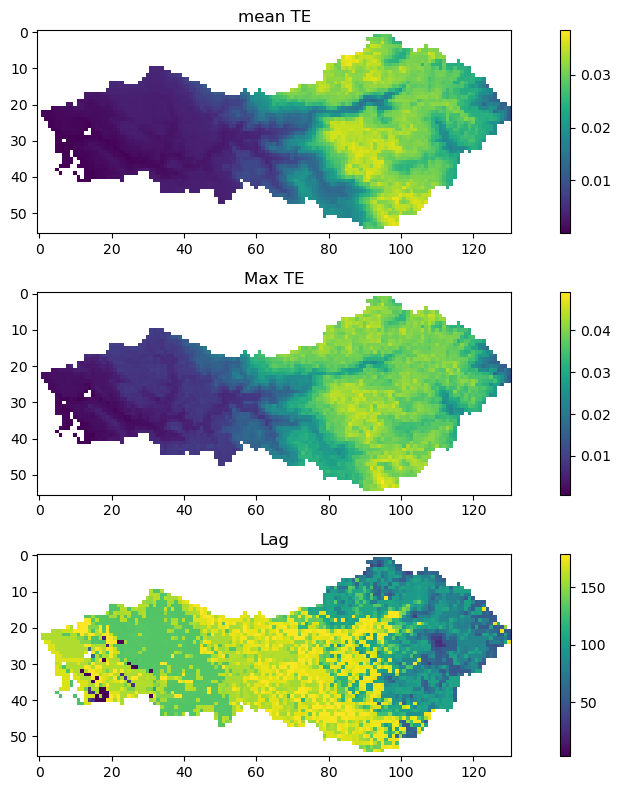

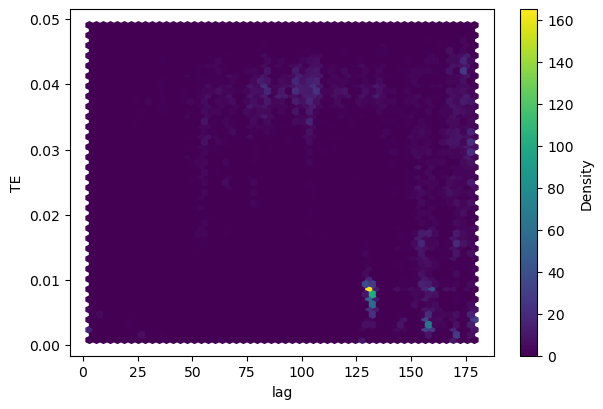

----------------------------------------------------------------------
SJF_result.npy
----------------------------------------------------------------------


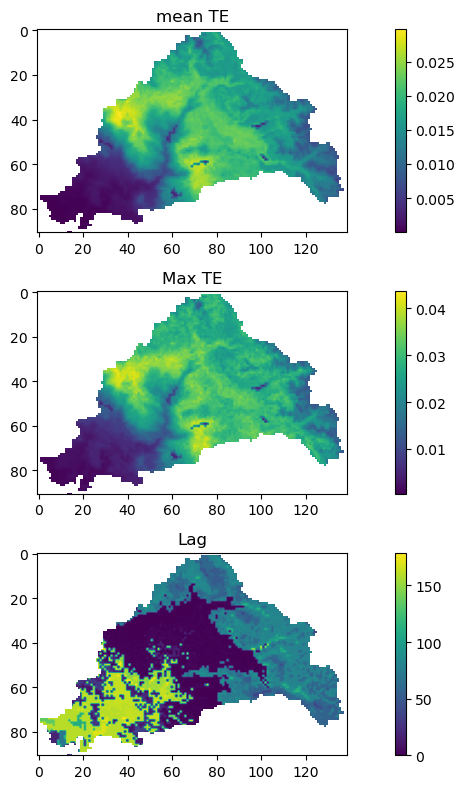

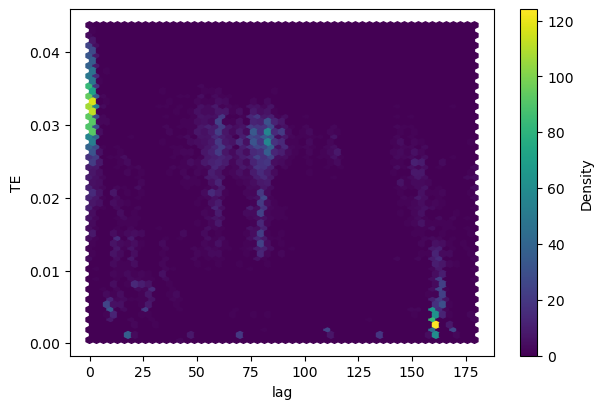

In [3]:
for file in files:
    
    print("-------"*10)
    print(os.path.split(file)[1])
    print("-------"*10)
    
    arr = np.load(file, allow_pickle=True)

    nanmask = np.isnan(np.nanmedian(arr, axis =2))

    plt.figure(figsize=(10,8))

    plt.subplot(3,1,1)
    plt.imshow(np.nanmedian(arr, axis =2)); plt.colorbar(); plt.title("mean TE"); plt.tight_layout()

    plt.subplot(3,1,2)
    plt.imshow(np.nanmax(arr, axis =2)); plt.colorbar(); plt.tight_layout();  plt.title("Max TE");

    plt.subplot(3,1,3)
    lag = np.argmax(arr, axis =2)

    lagmask = np.where(nanmask, np.nan, lag)
    plt.imshow(lagmask); plt.colorbar(); plt.tight_layout();  plt.title("Lag");
    
    plt.figure(figsize=(6,4))
    plt.subplot(1,1,1)
        
    x = lagmask.flatten()
    y = np.nanmax(arr,axis=2).flatten()

    # Remove NaN values from both arrays
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    # Create a hexbin density scatterplot
    plt.hexbin(x_clean, y_clean, gridsize=55, cmap='viridis'); plt.tight_layout(); plt.xlabel("lag"); plt.ylabel("TE");    plt.colorbar(label='Density')
    
    plt.show()
    